In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# show plot intermediately under the calling cell
%matplotlib inline

# disable some warnings
import warnings
warnings.simplefilter(action = "ignore")

# set to unlimited column display:
pd.set_option('display.max_columns', None)

# import database
df = pd.read_csv('results-2014.csv')

<center>Table: (sample) Dataframe including column dtype</center>

In [2]:
dtypes = pd.Series(df.dtypes,name='dtypes')
df.head(2).append(dtypes)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.3,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
dtypes,object,object,int64,object,object,int64,float64,object,int64,object,object,int64,float64,object,object,object,object,object,object,object,object


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.gender = le.fit_transform(df.gender)

In [3]:
df.drop(df[df['10k']=='-'].index, axis=0, inplace=True)
df.drop(df[df['25k']=='-'].index, axis=0, inplace=True)
df.drop(df[df['35k']=='-'].index, axis=0, inplace=True)
df.drop(df[df['30k']=='-'].index, axis=0, inplace=True)
df.drop(df[df['half']=='-'].index, axis=0, inplace=True)
df.drop(df[df['20k']=='-'].index, axis=0, inplace=True)
df.drop(df[df['40k']=='-'].index, axis=0, inplace=True)
df.drop(df[df['5k']=='-'].index, axis=0, inplace=True)

# Convert to numeric
df['10k']=pd.to_numeric(df['10k'])
df['25k']=pd.to_numeric(df['25k'])
df['35k']=pd.to_numeric(df['35k'])
df['30k']=pd.to_numeric(df['30k'])
df['half']=pd.to_numeric(df['half'])
df['20k']=pd.to_numeric(df['20k'])
df['40k']=pd.to_numeric(df['40k'])
df['5k']=pd.to_numeric(df['5k'])

# delete categorical data:
for col in df.columns:
    if df[col].dtype == np.object:
        del df[col]
        
# rearrange column order
df=df[['division','age','gender','genderdiv','overall','pace','5k','10k','20k','half','25k','30k','35k','40k','official']]

In [4]:
for i, classes in enumerate(le.classes_):
    print(i,classes)

0 F
1 M


In [5]:
dtypes = pd.Series(df.dtypes,name='dtypes')
df.head(2).append(dtypes)

,division,age,gender,genderdiv,overall,pace,5k,10k,20k,half,25k,30k,35k,40k,official
0,8,47,1,8,8,3.27,8.02,17.37,37.65,39.72,47.67,59.18,71.4,80.43,85.25
1,1,33,0,1,21,5.3,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.1,138.95
dtypes,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


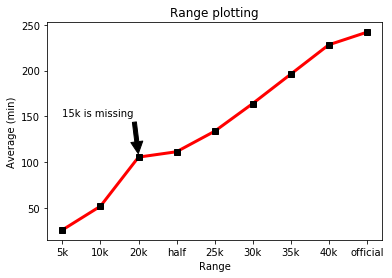

In [5]:
a = df.loc[:,'5k':'official'].mean()
plt.plot(a, 'r',linewidth=3)
plt.plot(a, 'ks',linewidth=3)
plt.xlabel('Range')
plt.ylabel('Average (min)')
plt.annotate('15k is missing', xy=('20k', 107), xytext=('5k', 150),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Range plotting')
plt.show()

<center>Figure: Correlation Matrix of some columns</center>

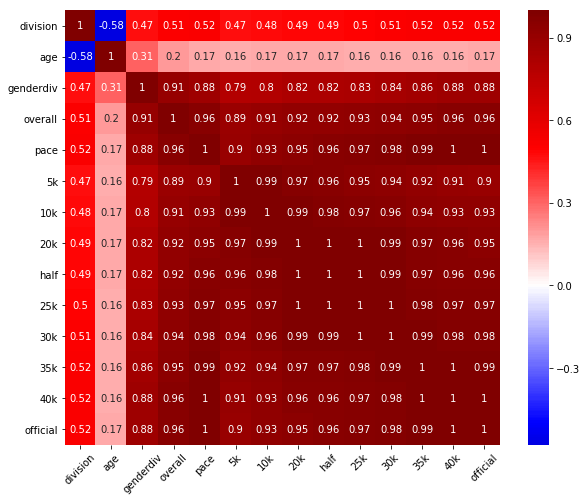

In [6]:
plt.figure(figsize=(10,8))
corr = df.loc[:,:].corr().round(2)
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap="seismic", square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0, annot= True)
plt.xticks(rotation=45)
plt.show()

In [10]:

X

,40k,genderdiv
0,80.43,8
1,132.10,1
2,76.10,1
3,132.95,3
4,76.72,2
5,132.95,4
6,79.83,4
7,122.80,5
8,76.70,3
9,129.83,20


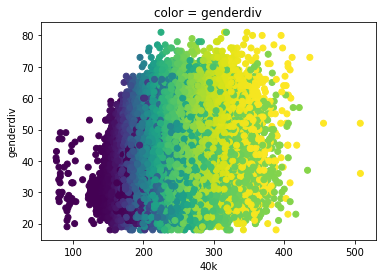

In [5]:
plt.scatter(df['40k'], df['age'],c=df['genderdiv'])
plt.xlabel('40k')
plt.ylabel('genderdiv')
plt.title("color = genderdiv")
plt.show()

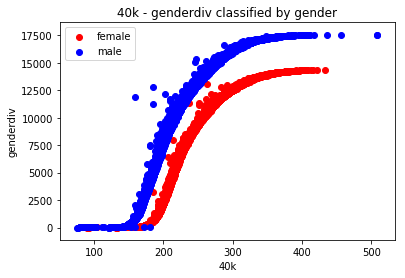

In [33]:
plt.scatter(df.loc[df.gender==0,'40k'], df.loc[df.gender==0,'genderdiv'], c='r', label = 'female')
plt.scatter(df.loc[df.gender==1,'40k'], df.loc[df.gender==1,'genderdiv'], c='b', label = 'male')
plt.xlabel('40k')
plt.ylabel('genderdiv')
plt.title("40k - genderdiv classified by gender")
plt.legend(loc=2)
plt.show()

In [8]:
X = df[['40k','genderdiv']]
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2,
                tol= 100,
                n_init=100,
                n_jobs=16)
y_pred = kmean.fit_predict(X)

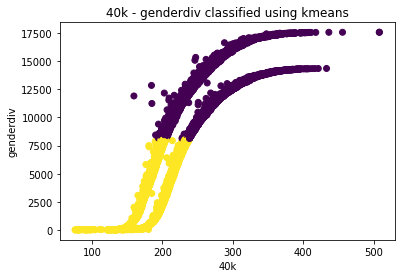

In [9]:
plt.scatter(df['40k'], df['genderdiv'], c=y_pred)
plt.xlabel('40k')
plt.ylabel('genderdiv')
plt.title("40k - genderdiv classified using kmeans")
plt.show()